# House Rental Prediction

In [329]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [304]:
#Loading the dataset
data = pd.read_csv(r'C:\Suriya - Personal\Data Scientist Course\Projects\House_Rental_Prediction_Using_KNN\house_rental_data.csv.txt',sep = ",")
df = pd.DataFrame(data)
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


## Exploratory Data Analysis (EDA) 

In [305]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [306]:
# Dropping the unwanted column
df.drop(df.columns[0], axis = 1, inplace = True)

In [307]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [308]:
list(df.columns)

['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']

In [309]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [310]:
df.nunique()

Sqft           288
Floor           21
TotalFloor      25
Bedroom          7
Living.Room      5
Bathroom         6
Price          153
dtype: int64

In [311]:
# Checking the missing values
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

There is no any null values in the dataset

### Data Cleaning 

In [312]:
# Checking any duplicated rows in a dataset
df[df.duplicated()]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
21,2768.124,6,19,3,2,2,100000
26,3664.740,19,19,3,2,3,200000
32,2134.800,10,19,3,2,2,55000
48,3735.900,19,19,3,2,3,200000
99,2063.640,5,7,4,2,2,70000
...,...,...,...,...,...,...,...
610,2134.800,3,6,4,2,3,98000
614,711.600,8,14,1,1,1,36000
630,1167.024,2,12,3,2,2,38000
638,1707.840,9,15,3,2,2,80000


There is 66 rows duplicated in a dataset

In [313]:
# Removing duplicate rows in a dataset
df.drop_duplicates(inplace = True)

In [314]:
df.shape

(579, 7)

Duplicates has been removed

In [315]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
639,2846.400,5,12,4,2,2,138888
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000


### Data Visualization

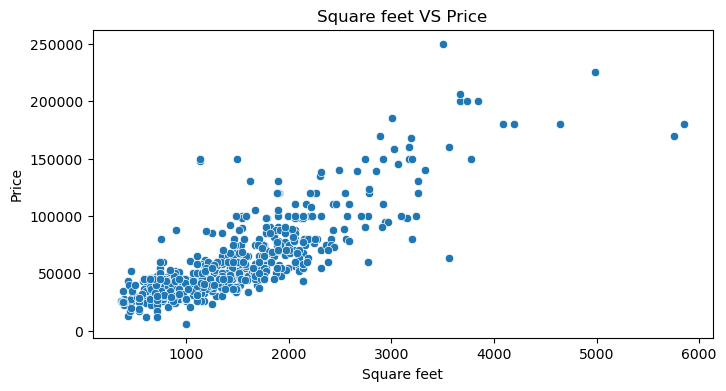

In [316]:
# Scatter Plot
plt.figure(figsize = (8, 4))
sns.scatterplot(x = 'Sqft', y = 'Price', data = df)
plt.title('Square feet VS Price')
plt.xlabel('Square feet')
plt.ylabel('Price')
plt.show()

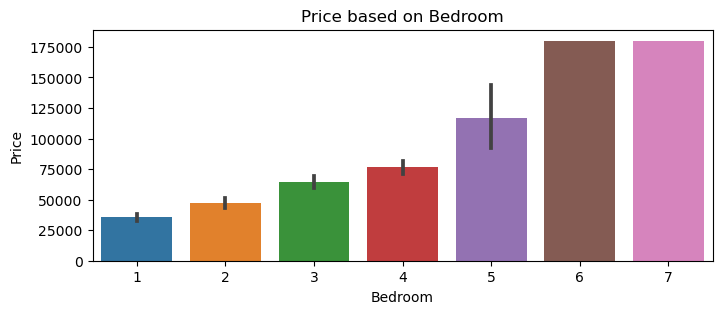

In [317]:
# Bar plot
plt.figure(figsize = (8, 3))
sns.barplot(x = 'Bedroom', y = 'Price', data = df)
plt.title('Price based on Bedroom')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()

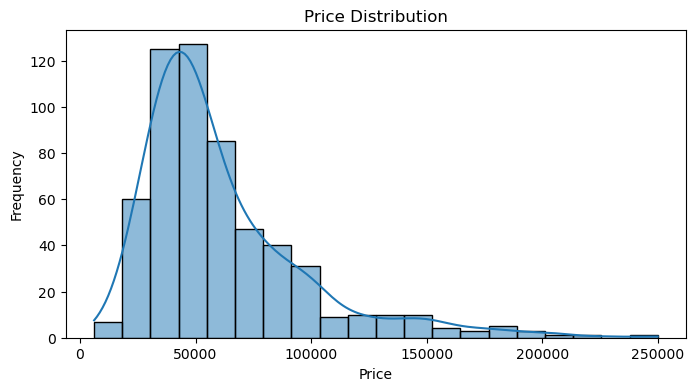

In [318]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

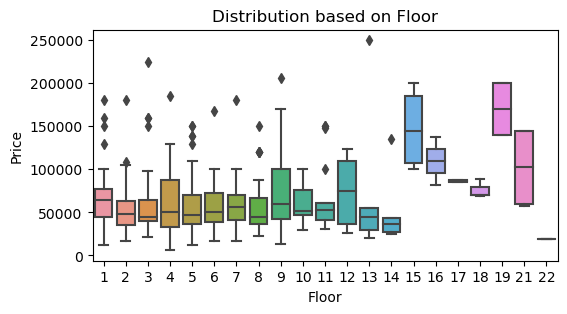

In [319]:
# Bar Plot
plt.figure(figsize = (6, 3))
sns.boxplot(x = 'Floor', y = 'Price', data = df)
plt.title('Distribution based on Floor')
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()

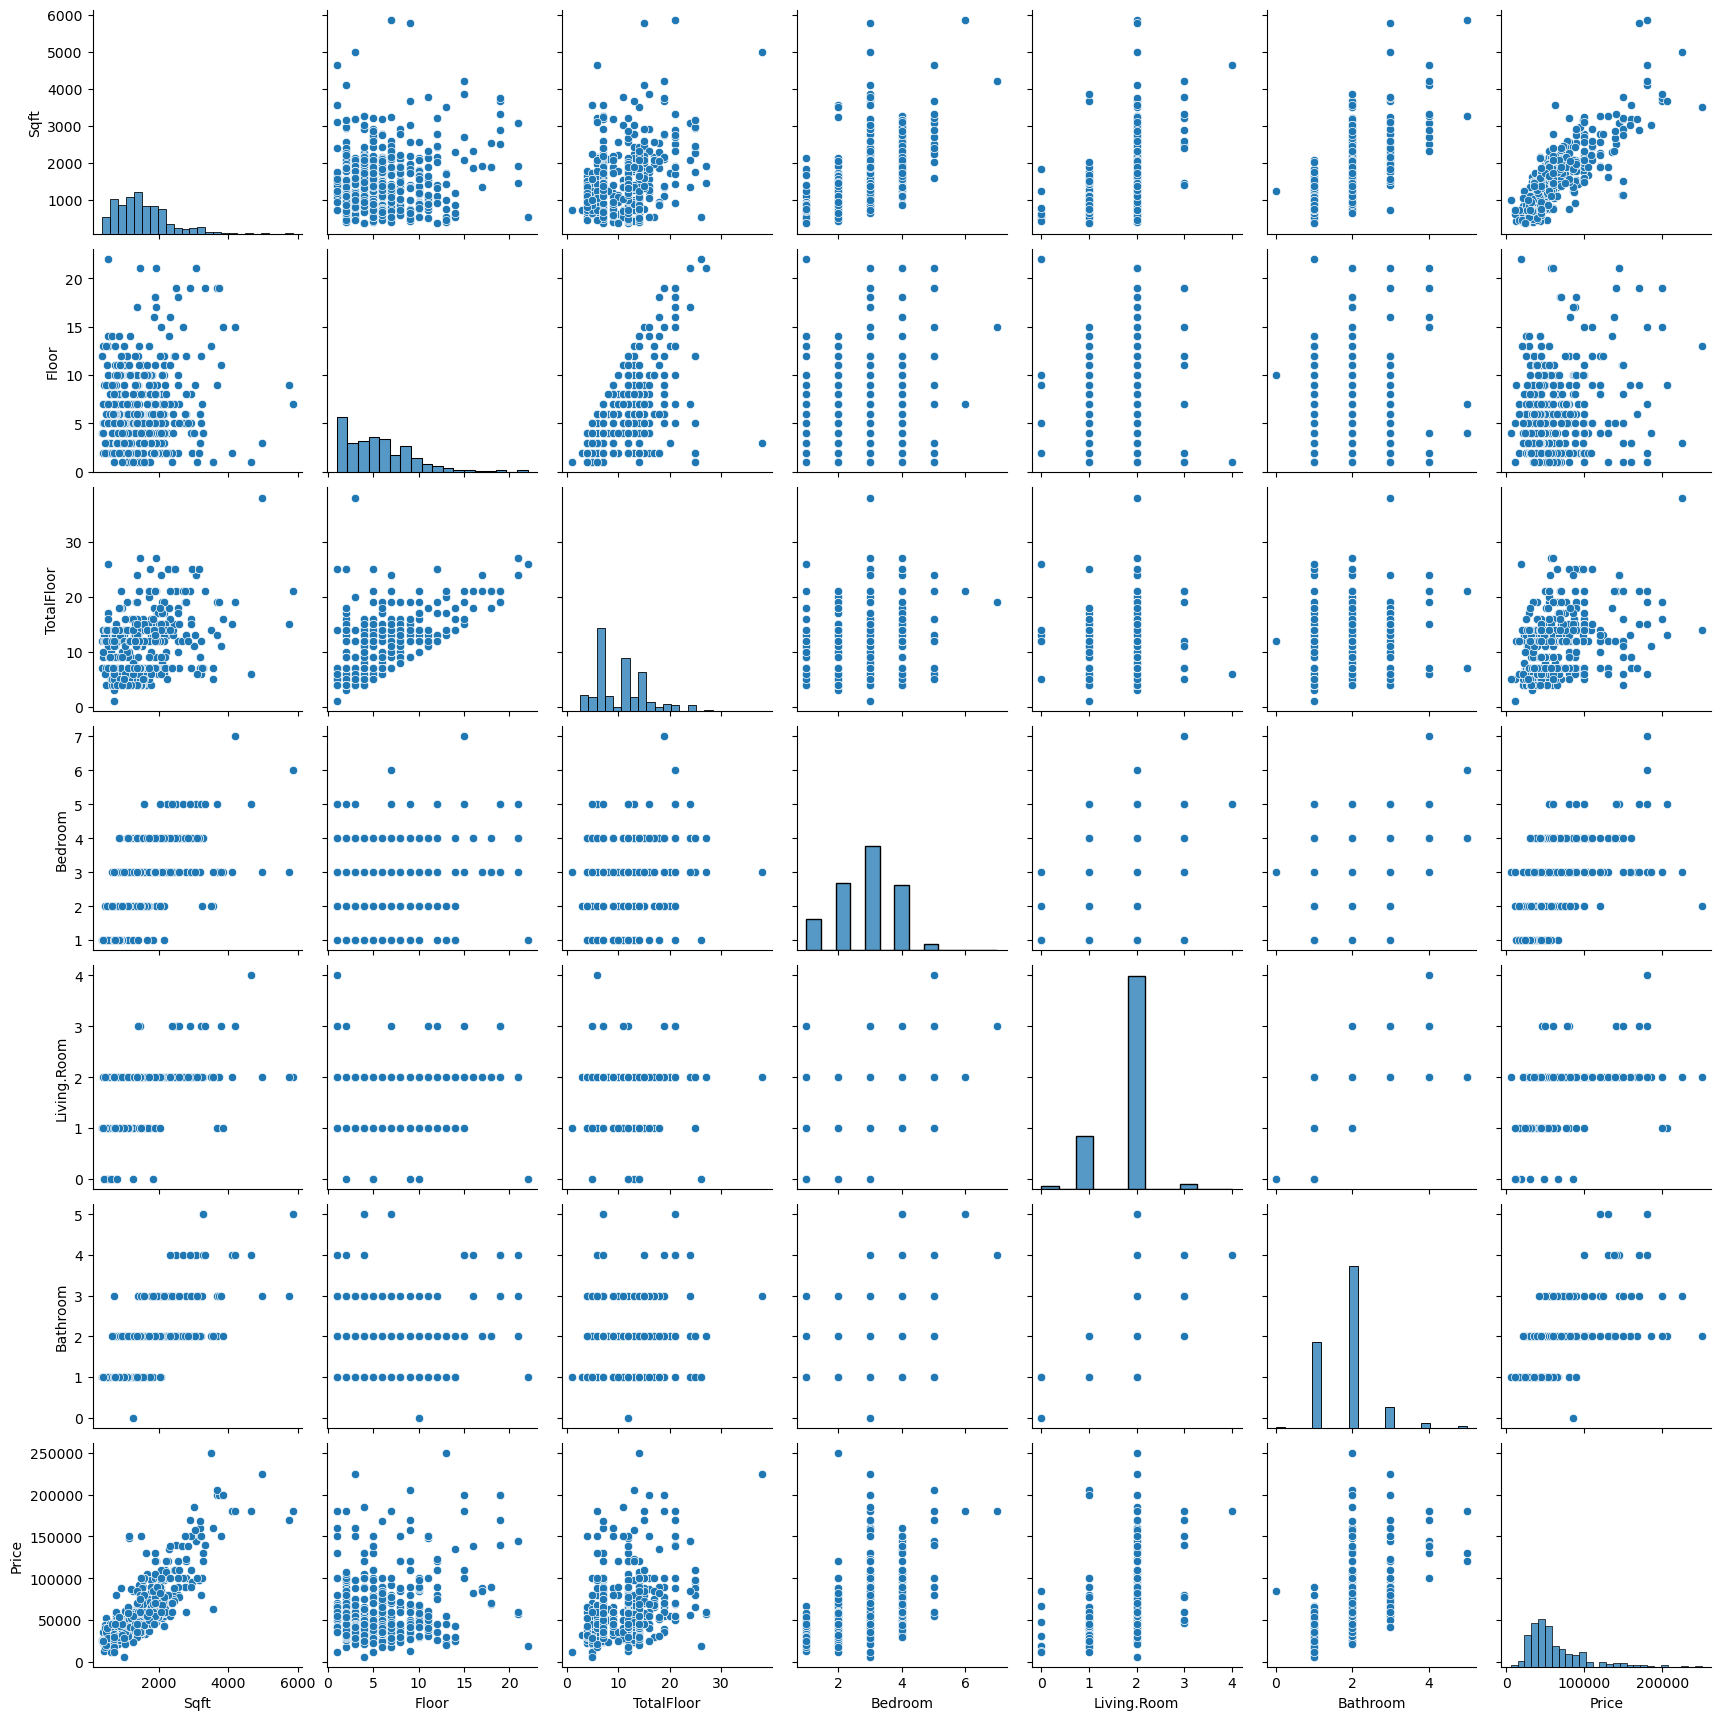

In [320]:
# Pair Plot for every two variables
sns.pairplot(df)
plt.show()

Data has been visualized and cleaned for Model Building

## Model Building 

### Split dataset to Train and Test

In [321]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [322]:
# Using MimMaxScaler because the data set is a non-normal distribution
mms = MinMaxScaler()
mms.fit(X_Train)
X_Train = mms.transform(X_Train)
X_Test = mms.transform(X_Test)

### Choosing Best K by taking sq.root on Training dataset

In [343]:
import math
k = int(math.sqrt(len(Y_Train)))
k

21

In [355]:
Regressor.fit(X_Train, Y_Train)

KNeighborsRegressor(n_neighbors=21)

In [356]:
Y_pred = Regressor.predict(X_Test)
Y_pred

array([ 81328.52380952,  43579.23809524,  51385.04761905,  73614.19047619,
        42128.42857143,  89333.28571429,  56523.61904762,  38655.95238095,
        28900.0952381 ,  51196.19047619,  70790.42857143,  31634.76190476,
        39815.80952381,  50007.80952381,  57142.66666667,  57418.85714286,
        32712.57142857,  90571.38095238,  42674.47619048,  61838.04761905,
        41341.14285714,  31700.        ,  79666.61904762,  40126.85714286,
        64298.85714286,  61190.85714286,  42388.76190476,  51843.80952381,
        48961.28571429,  73285.66666667,  38052.23809524,  55351.66666667,
        31928.        ,  40745.9047619 ,  35134.76190476,  43942.85714286,
        84994.57142857,  37229.95238095,  44461.76190476,  43242.85714286,
        72323.23809524,  57838.04761905,  68423.19047619,  61237.9047619 ,
        43219.04761905,  41684.        ,  64975.57142857, 116783.61904762,
        76375.52380952,  81619.        ,  39200.0952381 ,  83009.47619048,
        64647.47619048,  

### Evaluate the Model: 

In [357]:
r2 = r2_score(Y_Test, Y_pred)
mae = mean_absolute_error(Y_Test, Y_pred)
mse = mean_squared_error(Y_Test, Y_pred)

print(f'R2 score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

R2 score: 0.5122482443297609
Mean Absolute Error (MAE): 16449.42775041051
Mean Squared Error (MSE): 603409070.0121589
